In [ ]:
# Packages
import scanpy as sc # package for scRNA-seq data analysis
import numpy as np
import pandas as pd
import os
# import scvi
# import scanpy.external as sce

os.chdir('D:/OneDrive - International Campus, Zhejiang University/CAR_T_data') # Change pathway

In [ ]:
adata = sc.read("adata_umap.h5ad")

In [ ]:
adata

In [ ]:
sc.pl.umap(adata, color = 'leiden', legend_loc= "on data")

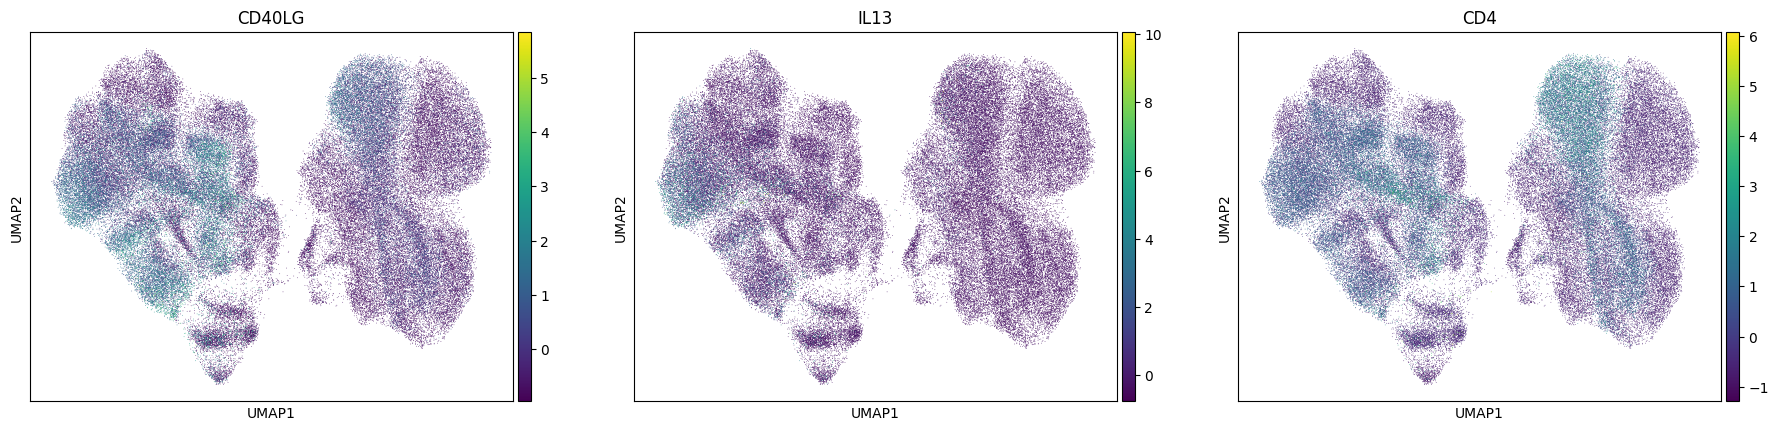

In [4]:
sc.pl.umap(adata, color = ['CD40LG', 'IL13', 'CD4'])

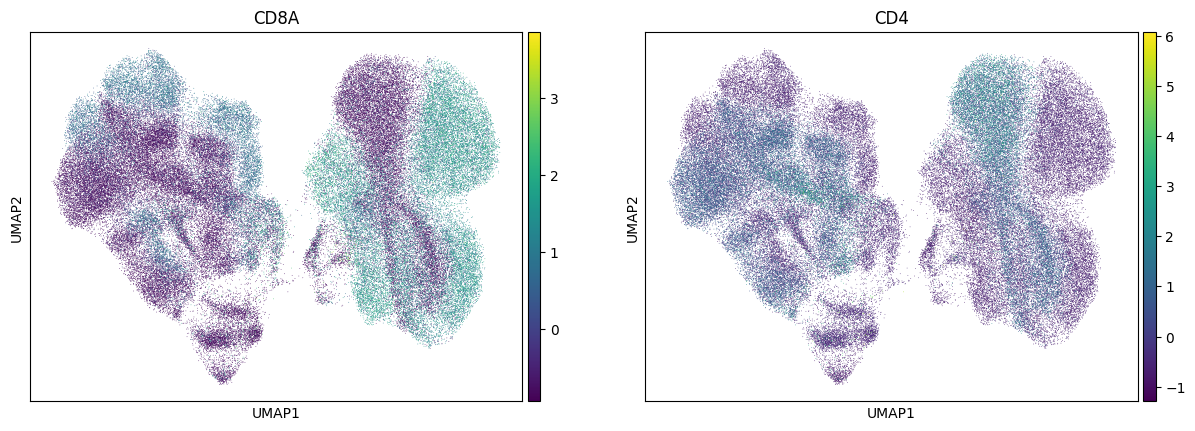

In [5]:
sc.pl.umap(adata, color = ['CD8A', 'CD4'])

d:\Python 3.10\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


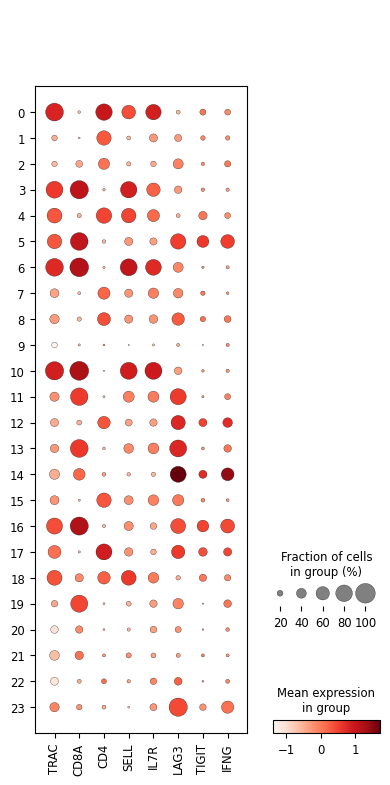

In [6]:
sc.pl.dotplot(adata, ['TRAC','CD8A', 'CD4', 'SELL', 'IL7R', 'LAG3','TIGIT','IFNG'], groupby = ['leiden'])

d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


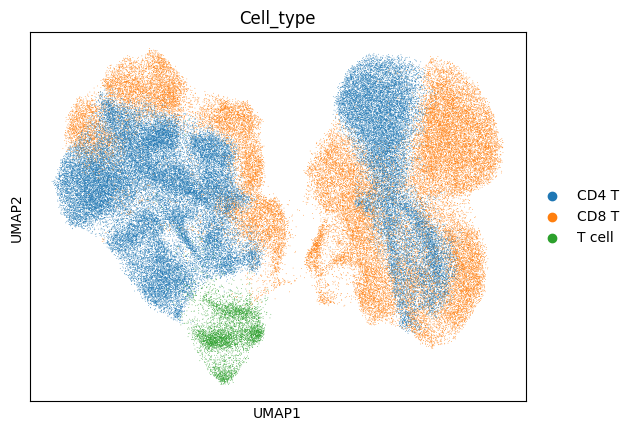

In [5]:
cluster_leiden_annotation = {'0': 'CD4 T', 
    '1': 'CD4 T', '2': 'CD4 T', '3': 'CD8 T', '4': 'CD4 T', 
    '5': 'CD8 T', '6': 'CD8 T', '7': 'CD4 T', '8': 'CD4 T', 
    '9': 'T cell', '10': 'CD8 T', '11': 'CD8 T', '12': 'CD4 T', 
    '13': 'CD8 T', '14': 'CD8 T', '15': 'CD4 T', '16': 'CD8 T', 
    '17': 'CD4 T', '18': 'CD4 T', '19': 'CD8 T', '20': 'CD8 T',
    '21': 'CD8 T', '22': 'CD4 T', '23': 'CD8 T'
    }


adata.obs["Cell_type"] = adata.obs['leiden'].map(cluster_leiden_annotation).astype('category')
sc.pl.umap(adata, color = ['Cell_type'])

d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


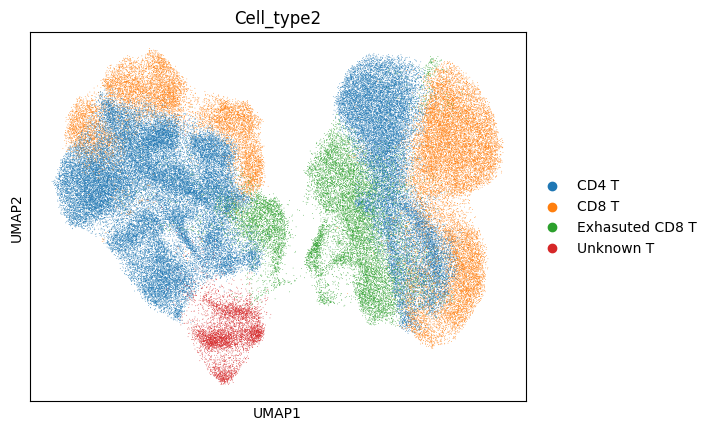

In [6]:
cluster_leiden_annotation2 = {'0': 'CD4 T', 
    '1': 'CD4 T', '2': 'CD4 T', '3': 'CD8 T', '4': 'CD4 T', 
    '5': 'Exhasuted CD8 T', '6': 'CD8 T', '7': 'CD4 T', '8': 'CD4 T', 
    '9': 'Unknown T', '10': 'CD8 T', '11': 'CD8 T', '12': 'CD4 T', 
    '13': 'CD8 T', '14': 'Exhasuted CD8 T', '15': 'CD4 T', '16': 'Exhasuted CD8 T', 
    '17': 'CD4 T', '18': 'CD4 T', '19': 'CD8 T', '20': 'Exhasuted CD8 T',
    '21': 'Exhasuted CD8 T', '22': 'CD4 T', '23': 'CD8 T'
    }


adata.obs["Cell_type2"] = adata.obs['leiden'].map(cluster_leiden_annotation2).astype('category')
sc.pl.umap(adata, color = ['Cell_type2'])

d:\Python 3.10\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


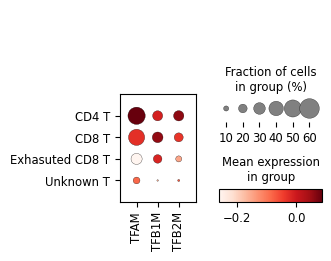

In [8]:
sc.pl.dotplot(adata, ['TFAM','TFB1M', 'TFB2M'], groupby = ['Cell_type2'])

d:\Python 3.10\lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


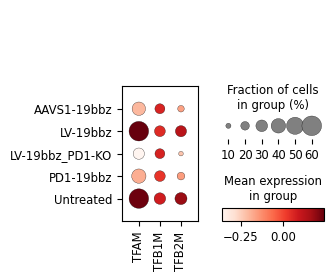

In [10]:
adata_CD8 = adata[np.array(adata.obs.Cell_type2 == 'CD8 T')]
sc.pl.dotplot(adata_CD8, ['TFAM','TFB1M', 'TFB2M'], groupby = ['method'])

In [32]:
adata.write("adata_annotated.h5ad")

In [33]:
adata_CD8 = adata[adata.obs['Cell_type2'] == 'CD8 T'].copy()
adata_CD4 = adata[adata.obs['Cell_type2'] == 'CD4 T'].copy()

In [34]:
adata_CD8.write("adata_CD8.h5ad")
adata_CD4.write("adata_CD4.h5ad")


In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [60]:
scvi.data.setup_anndata(adata, batch_key=None, labels_key='Cell_type2')
gene_dataset = scvi.data.GeneExpressionDataset(np.array(adata.X), gene_names=adata.var_names, cell_types=adata.obs['Cell_type2'])
model = scvi.model.SCANVI(gene_dataset)
results = model.differential_expression(groupby='Cell_type2', key_added='rank_genes')


INFO     No batch_key inputted, assuming all cells are same batch                                                  
INFO     Using labels from adata.obs["Cell_type2"]                                                                 
INFO     Using data from adata.X                                                                                   


d:\Python 3.10\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function setup_anndata is deprecated; Please use the model-specific setup_anndata methods instead. The global method will be removed in version 0.15.0.
  warnings.warn(msg, category=FutureWarning)


INFO     Successfully registered anndata object containing 105730 cells, 20992 vars, 1 batches, 4 labels, and 0    
         proteins. Also registered 0 extra categorical covariates and 0 extra continuous covariates.               
INFO     Please do not further modify adata until model is trained.                                                


d:\Python 3.10\lib\site-packages\scvi\data\_utils.py:36: RuntimeWarning: invalid value encountered in _is_not_count
  return ~np.any(_is_not_count(check))


AttributeError: module 'scvi.data' has no attribute 'GeneExpressionDataset'

In [ ]:
#Calculate marker genes
sc.tl.rank_genes_groups(adata, groupby='Cell_type2', key_added='rank_genes')
#Plot marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes', groups=['Unknown T','CD4 T','CD8 T'], fontsize=12)

In [45]:
sc.tl.rank_genes_groups(adata, 'Cell_type2', groups=['Unknown T'], reference='rest', method='wilcoxon')
gene_list_UT = sc.get.rank_genes_groups_df(adata, 'Unknown T', key = 'rank_genes_groups')

d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\__init__.py:430: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymin, ymax)


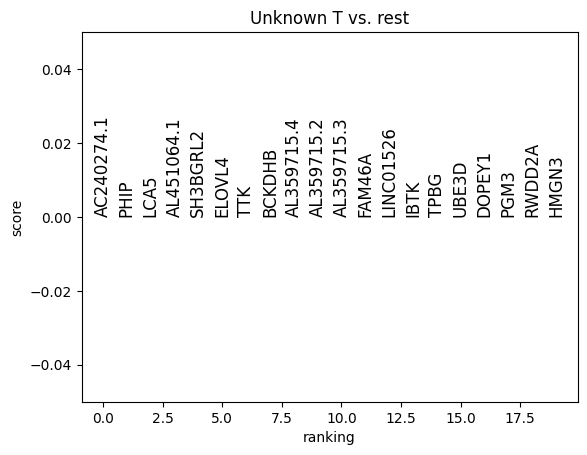

In [46]:
#Plot marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes', groups=['Unknown T'], fontsize=12)

In [56]:
sc.pl.dotplot(adata, gene_list_UT["names"][0: 10], groupby = ['Cell_type2'])

0    AC240274.1
1          PHIP
2          LCA5
3    AL451064.1
4      SH3BGRL2
5        ELOVL4
6           TTK
7        BCKDHB
8    AL359715.4
9    AL359715.2
Name: names, dtype: object

d:\Python 3.10\lib\site-packages\scanpy\plotting\_tools\__init__.py:430: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymin, ymax)


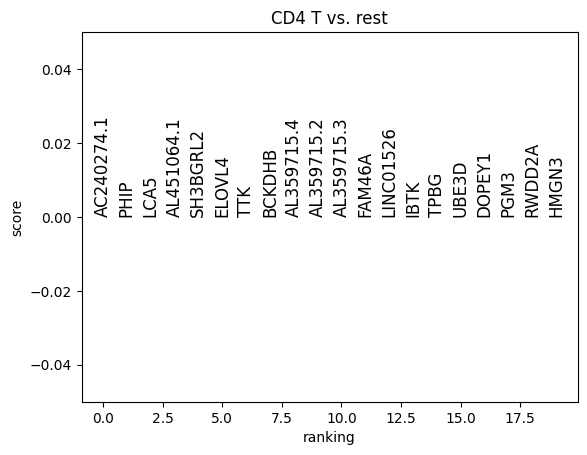

In [63]:
sc.tl.rank_genes_groups(adata, 'Cell_type2', groups=['CD4 T'], reference='rest', method='t-test')
gene_list_4T = sc.get.rank_genes_groups_df(adata, 'CD4 T', key = 'rank_genes_groups')
sc.pl.rank_genes_groups(adata, key='rank_genes', groups=['CD4 T'], fontsize=12)

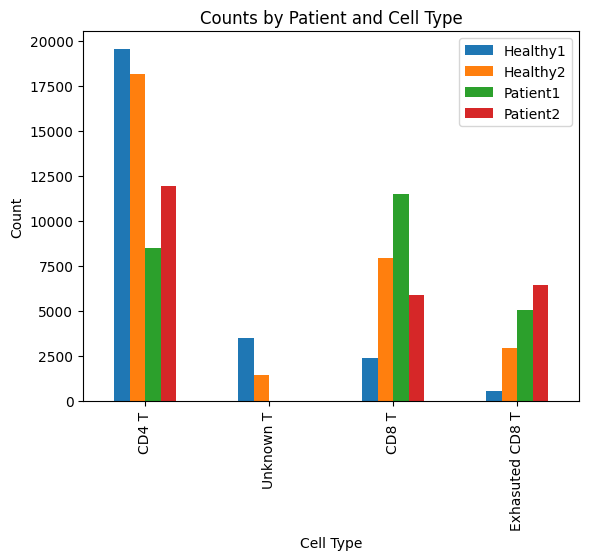

In [35]:
adata_by_patient = adata.obs.groupby('Patient')

counts_by_patient = pd.DataFrame()

for patient, group in adata_by_patient:
    counts = group['Cell_type2'].value_counts()
    counts_by_patient[patient] = counts

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

counts_by_patient.plot(kind='bar', ax=ax)

ax.set_xlabel('Cell Type')
ax.set_ylabel('Count')
ax.set_title('Counts by Patient and Cell Type')

plt.show()

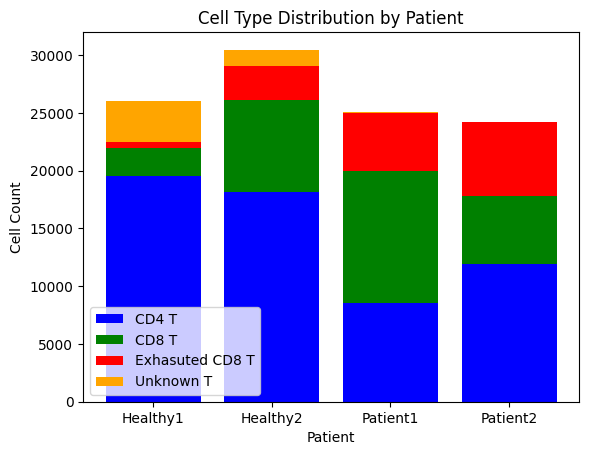

In [36]:
import pandas as pd
grouped = adata.obs.groupby(['Patient', 'Cell_type2']).size().reset_index(name='count')

import matplotlib.pyplot as plt
import numpy as np

# 获取所有的patient和cell_type
patients = grouped['Patient'].unique()
cell_types = grouped['Cell_type2'].unique()

# 创建堆积直方图
fig, ax = plt.subplots()
bottom = np.zeros(len(patients))
colors = ['blue', 'green', 'red', 'orange', 'purple'] # 可以自定义颜色
for i, cell_type in enumerate(cell_types):
    counts = grouped[grouped['Cell_type2']==cell_type]['count'].tolist()
    ax.bar(patients, counts, bottom=bottom, label=cell_type, color=colors[i])
    bottom += np.array(counts)

# 添加图例和标签
ax.legend()
ax.set_xlabel('Patient')
ax.set_ylabel('Cell Count')
ax.set_title('Cell Type Distribution by Patient')

plt.show()

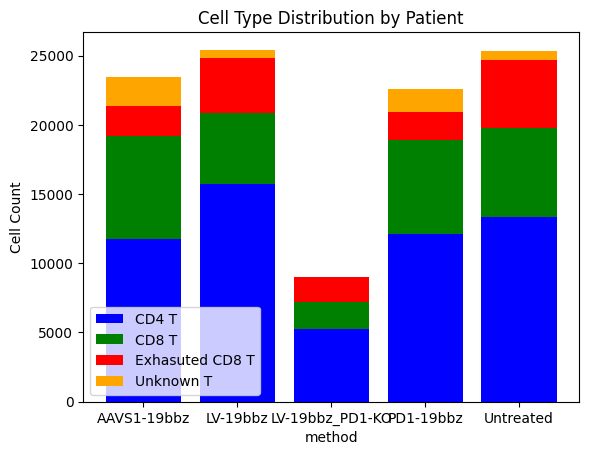

In [37]:
import pandas as pd
grouped = adata.obs.groupby(['method', 'Cell_type2']).size().reset_index(name='count')

import matplotlib.pyplot as plt
import numpy as np

# 获取所有的patient和cell_type
methods = grouped['method'].unique()
cell_types = grouped['Cell_type2'].unique()

# 创建堆积直方图
fig, ax = plt.subplots()
bottom = np.zeros(len(methods))
colors = ['blue', 'green', 'red', 'orange', 'purple'] # 可以自定义颜色
for i, cell_type in enumerate(cell_types):
    counts = grouped[grouped['Cell_type2']==cell_type]['count'].tolist()
    ax.bar(methods, counts, bottom=bottom, label=cell_type, color=colors[i])
    bottom += np.array(counts)

# 添加图例和标签
ax.legend()
ax.set_xlabel('method')
ax.set_ylabel('Cell Count')
ax.set_title('Cell Type Distribution by Patient')

plt.show()



C:\Users\li_ch\AppData\Local\Temp\ipykernel_13268\848947748.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  counts['prop'] = counts.groupby('Patient')['count'].apply(lambda x: x / x.sum())


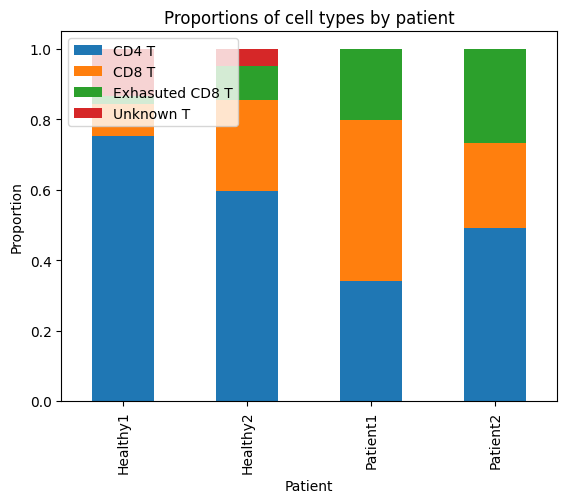

In [38]:
# 按照patient进行分组，计算每个patient中每种cell_type的数量
counts = adata.obs.groupby(['Patient', 'Cell_type2']).size().reset_index(name='count')

# 将数量转换为比例
counts['prop'] = counts.groupby('Patient')['count'].apply(lambda x: x / x.sum())

# 使用pivot函数将数据透视为适合堆叠直方图的形式
pivot_counts = counts.pivot(index='Patient', columns='Cell_type2', values='prop').fillna(0)

# 绘制堆叠直方图
pivot_counts.plot(kind='bar', stacked=True)

# 设置图形参数
plt.legend(loc='upper left')
plt.xlabel('Patient')
plt.ylabel('Proportion')
plt.title('Proportions of cell types by patient')
plt.show()


C:\Users\li_ch\AppData\Local\Temp\ipykernel_13268\1058921627.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  counts['prop'] = counts.groupby('method')['count'].apply(lambda x: x / x.sum())


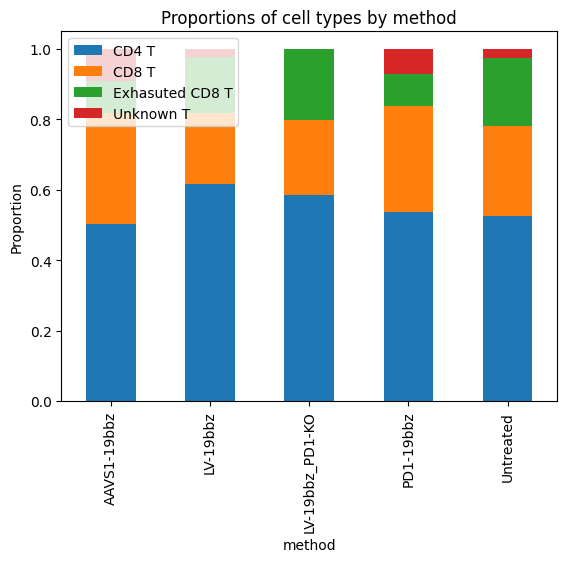

In [39]:
# 按照patient进行分组，计算每个patient中每种cell_type的数量
counts = adata.obs.groupby(['method', 'Cell_type2']).size().reset_index(name='count')

# 将数量转换为比例
counts['prop'] = counts.groupby('method')['count'].apply(lambda x: x / x.sum())

# 使用pivot函数将数据透视为适合堆叠直方图的形式
pivot_counts = counts.pivot(index='method', columns='Cell_type2', values='prop').fillna(0)

# 绘制堆叠直方图
pivot_counts.plot(kind='bar', stacked=True)

# 设置图形参数
plt.legend(loc='upper left')
plt.xlabel('method')
plt.ylabel('Proportion')
plt.title('Proportions of cell types by method')
plt.show()
